In [4]:
import pandas as pd

In [128]:
import tabulate
import numpy
from matplotlib import pyplot as plt

In [63]:
def clearlogs(protocols):
    if 's' in protocols:
        ! rm logsaw.txt
    if 'g' in protocols:
        ! rm loggbn.txt
    if 'sr' in protocols:
        ! rm logsr.txt

# Experiment 1

In [2]:
! rm logsaw.txt
for i in range (10):
    ! java ARQ 0 30 125000 10000 125 0.0001 0 SAW 

In [5]:
exp1_saw = pd.read_csv('logsaw.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])
exp1_saw

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
0,628228,121,0,10000,10000,10121,10121
1,629044,133,0,10000,10000,10133,10133
2,628160,120,0,10000,10000,10120,10120
3,626936,102,0,10000,10000,10102,10102
4,628160,120,0,10000,10000,10120,10120
5,627888,116,0,10000,10000,10116,10116
6,629452,139,0,10000,10000,10139,10139
7,629180,135,0,10000,10000,10135,10135
8,629112,134,0,10000,10000,10134,10134
9,629588,141,0,10000,10000,10141,10141


In [6]:
for i in range (10):
    !java ARQ 0 30 125000 10000 125 0.0001 0 GBN 8 

^C


In [8]:
# one more, to solve race condition
!java ARQ 0 30 125000 10000 125 0.0001 0 GBN 8 

In [9]:
exp1_gbn = pd.read_csv('loggbn.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])
exp1_gbn

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
0,78890,142,0,10167,10167,10308,10308
1,78143,123,0,10068,10068,10188,10188
2,78110,138,0,10028,10028,10164,10164
3,78201,135,0,10046,10046,10180,10180
4,78094,112,0,10047,10047,10164,10164
5,78684,120,0,10122,10122,10244,10244
6,77990,104,0,10035,10035,10140,10140
7,78977,139,0,10162,10162,10299,10299
8,78238,122,0,10052,10052,10172,10172
9,78149,129,0,10055,10055,10184,10184


In [15]:
saw = exp1_saw.mean()
gbn = exp1_gbn.mean()

<div>
<img src=attachment:image-2.png width="500"/>
<div>
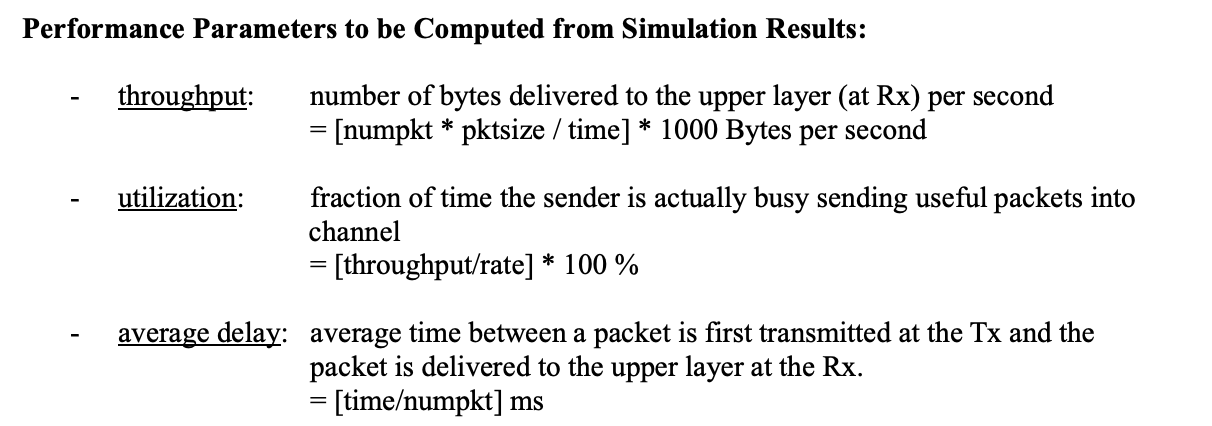

In [50]:
s_thru = round(saw['#datapktsrcvd'] * 125 / saw['time'] * 1000)
b_thru = round(gbn['#datapktsrcvd'] * 125 / gbn['time'] * 1000)
data = {
    '': ['Throughput (Bytes/s)', 'Utilization', 'Delay (ms)'],
    'Saw': [ 
            s_thru, 
            s_thru / 125000 * 100, 
            saw['time'] / saw['#datapktsrcvd'], 
           ],
    'GBN': [
            b_thru, 
            b_thru / 125000 * 100, 
            gbn['time'] / gbn['#datapktsrcvd']
           ]
}

## Table Results

In [51]:
pd.DataFrame(data)

,,Saw,GBN
0,Throughput (Bytes/s),2014.000000,16280.0000
1,Utilization,1.611200,13.0240
2,Delay (ms),62.074718,7.6779


## Interpretation
lorum ipsum

# Experiment 2
<div>
<img src=attachment:image-2.png width="500"/>
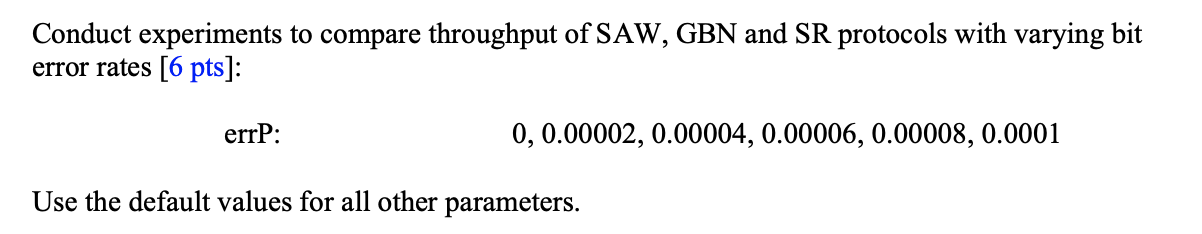

In [110]:
packets = 10000
delay = 30
rate = 125000
numpkt = 10000
pktsize = 125
errp = [0, 0.00002, 0.00004, 0.00006, 0.00008, 0.0001]
dropP = 0
N = 8

### SAW Calculations

In [171]:
clearlogs(['s'])
for x in errp:
    for y in range (10):
        saw_cmd = ('java ARQ 0 %s %s %s %s %s %s SAW' % (delay, rate, numpkt, pktsize, x, dropP))
        ! $saw_cmd

In [188]:
exp2_saw = pd.read_csv('logsaw.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])

In [189]:
exp2_saw['Err Prob'] = [item for item in errp for _ in range(10)]
exp2_saw_res = exp2_saw.groupby(['Err Prob']).mean()
exp2_saw_res

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
Err Prob,,,,,,,
0.00000,620000.0,0.0,0.0,10000.0,10000.0,10000.0,10000.0
0.00002,621727.2,25.4,0.0,10000.0,10000.0,10025.4,10025.4
0.00004,623406.8,50.1,0.0,10000.0,10000.0,10050.1,10050.1
0.00006,625263.2,77.4,0.0,10000.0,10000.0,10077.4,10077.4
0.00008,627085.6,104.2,0.0,10000.0,10000.0,10104.2,10104.2
0.00010,628411.6,123.7,0.0,10000.0,10000.0,10123.7,10123.7


### GBN Calculations

In [166]:
clearlogs(['g'])
for x in errp:
    print (x)
    for y in range (10):
        gbn_cmd = ('java ARQ 0 %s %s %s %s %s %s GBN %s' % (delay, rate, numpkt, pktsize, x, dropP, N))
        ! $gbn_cmd

0
2e-05
4e-05
6e-05
8e-05
^C
0.0001


In [186]:
exp2_gbn = pd.read_csv('loggbn.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])

In [187]:
exp2_gbn['Err Prob'] = [item for item in errp for _ in range(10)]
exp2_gbn_res = exp2_gbn.groupby(['Err Prob']).mean()
exp2_gbn_res

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
Err Prob,,,,,,,
0.00000,77507.0,0.0,0.0,10000.0,10000.0,10000.0,10000.0
0.00002,77779.0,26.2,0.0,10030.3,10030.3,10056.4,10056.4
0.00004,77880.0,51.0,0.0,10043.1,10043.1,10094.4,10094.4
0.00006,78013.9,77.6,0.0,10050.4,10050.4,10128.4,10128.4
0.00008,78164.9,106.7,0.0,10055.4,10055.4,10162.8,10162.8
0.00010,78247.3,129.4,0.0,10063.7,10063.7,10192.2,10192.2


### SR Calculations

In [164]:
clearlogs(['sr'])
for x in errp:
    print (x)
    for y in range (10):
        sr_cmd = ('java ARQ 0 %s %s %s %s %s %s SR %s' % (delay, rate, numpkt, pktsize, x, dropP, N))
        ! $sr_cmd

rm: logsr.txt: No such file or directory
0
2e-05
4e-05
6e-05
8e-05
0.0001


In [184]:
exp2_sr = pd.read_csv('logsr.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])

In [185]:
exp2_sr['Err Prob'] = [item for item in errp for _ in range(10)]
exp2_sr_res = exp2_sr.groupby(['Err Prob']).mean()
exp2_sr_res

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
Err Prob,,,,,,,
0.00000,77507.0,0.0,0.0,10000.0,10000.0,10000.0,10000.0
0.00002,78627.6,24.8,0.0,10000.0,10000.0,10024.8,10024.8
0.00004,79721.9,50.0,0.0,10000.0,10000.0,10050.0,10050.0
0.00006,80851.4,76.4,0.0,10000.0,10000.0,10076.4,10076.4
0.00008,81687.6,98.7,0.0,10000.0,10000.0,10098.7,10098.7
0.00010,83026.6,127.3,0.0,10000.0,10000.0,10127.3,10127.3


## Graph

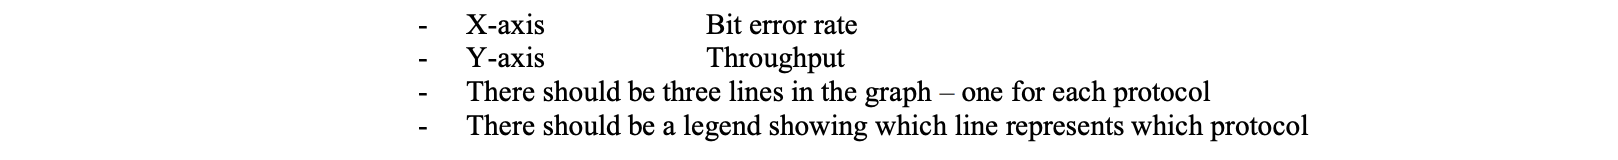

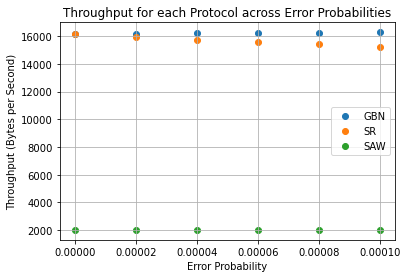

In [250]:
gbn_throughput = round(exp2_gbn_res['#datapktsrcvd'] * 125 / exp2_gbn_res['time'] * 1000)
plt.scatter(exp2_gbn_res.index.values, gbn_throughput.values, label='GBN')

sr_throughput = round(exp2_sr_res['#datapktsrcvd'] * 125 / exp2_sr_res['time'] * 1000)
plt.scatter(exp2_sr_res.index.values, sr_throughput.values, label='SR')

saw_throughput = round(exp2_saw_res['#datapktsrcvd'] * 125 / exp2_saw_res['time'] * 1000)
plt.scatter(exp2_saw_res.index.values, saw_throughput.values, label='SAW')

plt.legend()
plt.xlabel('Error Probability')
plt.ylabel('Throughput (Bytes per Second)')
plt.title('Throughput for each Protocol across Error Probabilities')
plt.grid()
plt.show()

### Interpret Results

asldfjasldkfjaslkdfjslkdfjzslf

# Exercise 3

In [183]:
windows = [1, 4, 8, 12, 16, 32, 40]
default_e = 0.0001

### SAW Calculations

In [212]:
clearlogs(['s'])
for y in range (10):
    saw_cmd = ('java ARQ 0 %s %s %s %s %s %s SAW' % (delay, rate, numpkt, pktsize, default_e, dropP))
    ! $saw_cmd

rm: logsaw.txt: No such file or directory


In [213]:
exp3_saw = pd.read_csv('logsaw.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])

In [214]:
exp3_saw

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
0,627684,113,0,10000,10000,10113,10113
1,629520,140,0,10000,10000,10140,10140
2,629044,133,0,10000,10000,10133,10133
3,627412,109,0,10000,10000,10109,10109
4,627480,110,0,10000,10000,10110,10110
5,629180,135,0,10000,10000,10135,10135
6,627344,108,0,10000,10000,10108,10108
7,628772,129,0,10000,10000,10129,10129
8,627412,109,0,10000,10000,10109,10109
9,628092,119,0,10000,10000,10119,10119


### GBN Calculations

In [222]:
clearlogs(['g'])
for w in windows:
    print (w)
    for y in range (10):
        gbn_cmd = ('java ARQ 0 %s %s %s %s %s %s GBN %s' % (delay, rate, numpkt, pktsize, default_e, dropP, w))
        ! $gbn_cmd

1
4
8
^C
12
16
^C
32
40


In [225]:
gbn_cmd

'java ARQ 0 30 125000 10000 125 0.0001 0 GBN 40'

In [227]:
exp3_gbn = pd.read_csv('loggbn.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])

In [228]:
exp3_gbn['Window'] = [item for item in windows for _ in range(10)]
exp3_gbn_res = exp3_gbn.groupby(['Window']).mean()
exp3_gbn_res

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
Window,,,,,,,
1,628030.8,118.1,0.0,10000.0,10000.0,10118.1,10118.1
4,161315.2,133.6,0.0,10378.9,10378.9,10512.0,10512.0
8,75645.2,120.8,0.0,10070.5,10070.5,10189.6,10189.6
12,50955.8,125.0,0.0,10093.6,10093.6,10218.0,10218.0
16,36768.4,142.7,0.0,10905.7,10904.7,11049.3,11049.3
32,25468.4,169.5,0.0,14000.6,14000.6,14170.1,14170.1
40,23020.4,193.1,0.0,14938.0,14938.0,15131.1,15131.1


### SR Calculation

In [217]:
clearlogs(['sr'])
for w in windows:
    print (w)
    for y in range (10):
        sr_cmd = ('java ARQ 0 %s %s %s %s %s %s SR %s' % (delay, rate, numpkt, pktsize, default_e, dropP, w))
        ! $sr_cmd

1
4
8
12
16
32
40


In [220]:
exp3_sr = pd.read_csv('logsr.txt', sep=' ', header=None, names=['time', '#errorpkts', '#droppedpkts', '#ctrlpktsent', '#ctrlpktsrcvd', '#datapktssent', '#datapktsrcvd' ])

In [221]:
exp3_sr['Window'] = [item for item in windows for _ in range(10)]
exp3_sr_res = exp3_sr.groupby(['Window']).mean()
exp3_sr_res

,time,#errorpkts,#droppedpkts,#ctrlpktsent,#ctrlpktsrcvd,#datapktssent,#datapktsrcvd
Window,,,,,,,
1,628656.4,127.3,0.0,10000.0,10000.0,10127.3,10127.3
4,160647.6,124.4,0.0,10000.0,10000.0,10124.4,10124.4
8,82682.9,124.4,0.0,10000.0,10000.0,10124.4,10124.4
12,56632.5,119.2,0.0,10000.0,10000.0,10119.2,10119.2
16,43970.6,124.6,0.0,10000.0,10000.0,10124.6,10124.6
32,24670.5,127.4,0.0,10000.0,10000.0,10127.4,10127.4
40,20477.3,121.3,0.0,10000.0,10000.0,10121.3,10121.3


## Graph

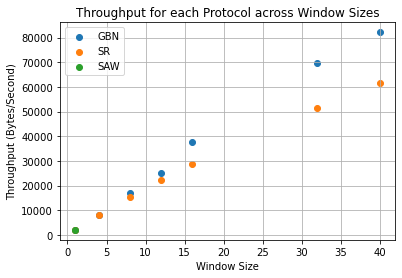

In [251]:
gbn3_throughput = round(exp3_gbn_res['#datapktsrcvd'] * 125 / exp3_gbn_res['time'] * 1000)
plt.scatter(exp3_gbn_res.index.values, gbn3_throughput.values, label='GBN')

sr3_throughput = round(exp3_sr_res['#datapktsrcvd'] * 125 / exp3_sr_res['time'] * 1000)
plt.scatter(exp3_sr_res.index.values, sr3_throughput.values, label='SR')

exp3_saw_mean = exp3_saw.mean()
saw3_throughput = round(exp3_saw_mean['#datapktsrcvd'] * 125 / exp3_saw_mean['time'] * 1000)
plt.scatter(1, saw3_throughput, label='SAW')

plt.legend()
plt.xlabel('Window Size')
plt.ylabel('Throughput (Bytes/Second)')
plt.title('Throughput for each Protocol across Window Sizes')
plt.grid()
plt.show()

## Interpret / Explain

# Experiment 4

Using data run in experiment #3

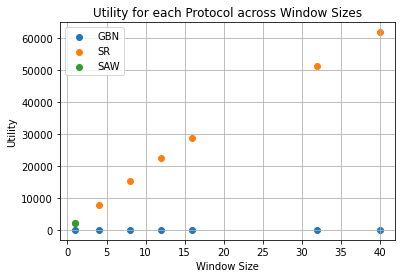

In [246]:
gbn4_util = gbn3_throughput / rate * 100
plt.scatter(exp3_gbn_res.index.values, gbn4_util.values, label='GBN')

sr4_util = sr3_throughput / rate * 100
plt.scatter(exp3_sr_res.index.values, sr3_throughput.values, label='SR')

exp3_saw_mean = exp3_saw.mean()
sr4_util = saw3_throughput / rate * 100
plt.scatter(1, saw3_throughput, label='SAW')

plt.legend()
plt.xlabel('Window Size')
plt.ylabel('Utility')
plt.title('Utility for each Protocol across Window Sizes')
plt.grid()
plt.show()

### Interpret / Explain

# Experiment 5

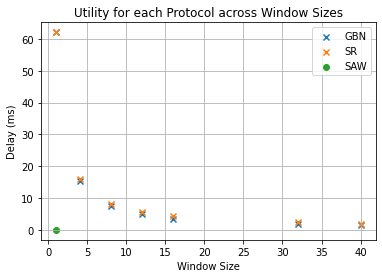

In [260]:
gbn5_delay = exp3_gbn_res['time'] / exp3_gbn_res['#datapktsrcvd']
plt.scatter(exp3_gbn_res.index.values, gbn5_delay, label='GBN', marker='x')

sr5_delay = exp3_sr_res['time'] / exp3_sr_res['#datapktsrcvd']
plt.scatter(exp3_sr_res.index.values, sr5_delay.values, label='SR', marker='x')

saw5_delay = exp3_saw_mean['#datapktsrcvd'] / exp3_saw_mean['time']
plt.scatter(1, saw5_delay, label='SAW')

plt.legend()
plt.xlabel('Window Size')
plt.ylabel('Delay (ms)')
plt.title('Utility for each Protocol across Window Sizes')
plt.grid()
plt.show()

### Interpret

asdlfkjasfl